In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, zero_one_loss, confusion_matrix
import sklearn.neural_network as nn
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
data = mnist.data
target = mnist.target
#division de la base en données d'apprentissage (49000) et de test
datatrain, datatest, targettrain, targettest = train_test_split(data, target,train_size=0.70)
print(datatrain.shape)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(49000, 784)


In [4]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(50))
mlp.fit(datatrain,targettrain)
mlp.score(datatest,targettest)

0.9516666666666667

In [5]:
print(targettest[3])
print(mlp.predict(datatest)[3])

0
0


In [6]:
print(precision_score(targettest,mlp.predict(datatest),average='micro'))

0.9516666666666667


In [7]:
precisions_couches = []
temps_couches = []
tt_couches = []
rappel_couches = []
erreur_couches = []
train_precisions_couches = []
for nb_c in [2,10,20,50,70,100]:
    hls = tuple(50 for i in range(nb_c))
    mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
    st = time.time()
    start_time = time.process_time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    prec = mlp.score(datatest,targettest)
    testpred = mlp.predict(datatest)
    precisions_couches.append(prec)
    temps_couches.append(elapsed)
    tt_couches.append(duration)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    rappel_couches.append(rap)
    erreur_couches.append(err)
    prec_train = mlp.score(datatrain,targettrain)
    train_precisions_couches.append(prec_train)
    print("precision =", prec, "temps =", elapsed,"time =",duration,"sur train =",prec_train, "pour", nb_c,"couches")

precision = 0.9598571428571429 temps = 244.4375 time = 125.1036446094513 sur train = 0.9936530612244898 pour 2 couches
precision = 0.971047619047619 temps = 200.375 time = 101.42576265335083 sur train = 0.9963265306122449 pour 10 couches
precision = 0.9675714285714285 temps = 319.421875 time = 161.50935006141663 sur train = 0.990734693877551 pour 20 couches
precision = 0.8391428571428572 temps = 172.34375 time = 86.7477879524231 sur train = 0.8422857142857143 pour 50 couches
precision = 0.11295238095238096 temps = 219.34375 time = 110.19453835487366 sur train = 0.1123469387755102 pour 70 couches
precision = 0.11295238095238096 temps = 287.15625 time = 144.54774928092957 sur train = 0.1123469387755102 pour 100 couches


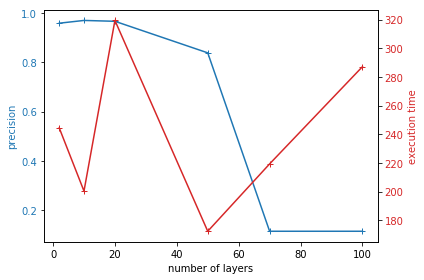

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of layers')
ax1.set_ylabel('precision', color=color)
ax1.plot([2,10,20,50,70,100],precisions_couches,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([2,10,20,50,70,100],temps_couches,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

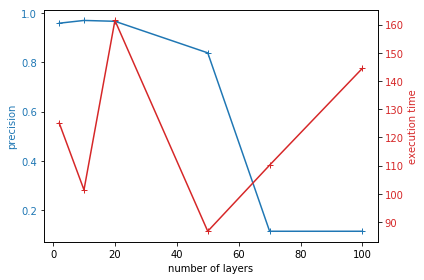

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of layers')
ax1.set_ylabel('precision', color=color)
ax1.plot([2,10,20,50,70,100],precisions_couches,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([2,10,20,50,70,100],tt_couches,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

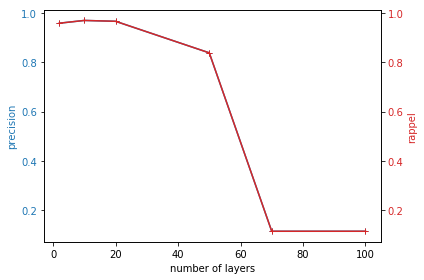

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of layers')
ax1.set_ylabel('precision', color=color)
ax1.plot([2,10,20,50,70,100],precisions_couches,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot([2,10,20,50,70,100],rappel_couches,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

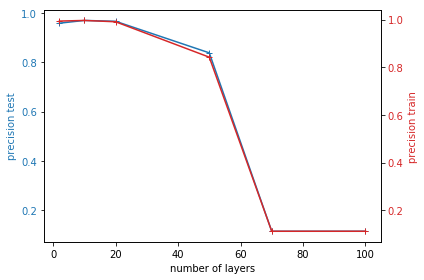

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of layers')
ax1.set_ylabel('precision test', color=color)
ax1.plot([2,10,20,50,70,100],precisions_couches,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('precision train', color=color)
ax2.plot([2,10,20,50,70,100],train_precisions_couches,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

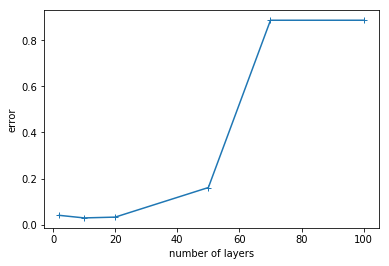

In [12]:
plt.plot([2,10,20,50,70,100],erreur_couches,'+-')
plt.ylabel('error')
plt.xlabel('number of layers')
plt.show()

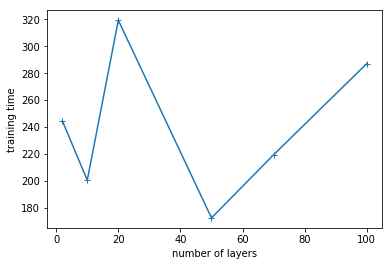

In [13]:
plt.plot([2,10,20,50,70,100],temps_couches,'+-')
plt.ylabel('training time')
plt.xlabel('number of layers')
plt.show()

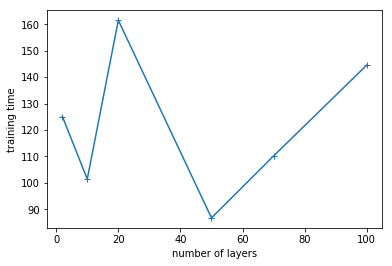

In [14]:
plt.plot([2,10,20,50,70,100],tt_couches,'+-')
plt.ylabel('training time')
plt.xlabel('number of layers')
plt.show()

In [15]:
precisions_neurones = []
temps_neurones = []
tt_neurones = []
rappel_neurones = []
erreur_neurones = []
for nb_n in [5,10,20,30,40,50,60,70,80,90,100,150,200,300]:
    hls = tuple(nb_n for i in range(10))
    mlp = nn.MLPClassifier(hidden_layer_sizes=hls)
    st = time.time()
    start_time = time.process_time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time() - st
    prec = mlp.score(datatest,targettest)
    testpred = mlp.predict(datatest)
    precisions_neurones.append(prec)
    temps_neurones.append(elapsed)
    tt_neurones.append(duration)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    rappel_neurones.append(rap)
    erreur_neurones.append(err)
    prec_train = mlp.score(datatrain,targettrain)
    print("precision =", prec, "temps =", elapsed,"sur train =",prec_train, "pour", nb_n,"neurones")

precision = 0.8214285714285714 temps = 217.609375 sur train = 0.8355510204081633 pour 5 neurones
precision = 0.913 temps = 215.890625 sur train = 0.949530612244898 pour 10 neurones
precision = 0.9537619047619048 temps = 207.65625 sur train = 0.9894897959183674 pour 20 neurones
precision = 0.957 temps = 207.46875 sur train = 0.9880612244897959 pour 30 neurones
precision = 0.9665238095238096 temps = 188.40625 sur train = 0.9936530612244898 pour 40 neurones
precision = 0.9702380952380952 temps = 338.515625 sur train = 0.9965306122448979 pour 50 neurones
precision = 0.9699523809523809 temps = 275.5 sur train = 0.9973061224489795 pour 60 neurones
precision = 0.9746666666666667 temps = 265.34375 sur train = 0.9980816326530613 pour 70 neurones
precision = 0.973047619047619 temps = 258.703125 sur train = 0.9968163265306123 pour 80 neurones
precision = 0.9760952380952381 temps = 346.859375 sur train = 0.998265306122449 pour 90 neurones
precision = 0.9761428571428571 temps = 408.046875 sur train

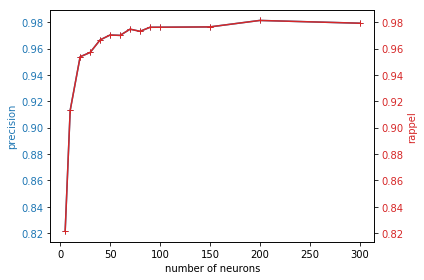

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of neurons')
ax1.set_ylabel('precision', color=color)
ax1.plot([5,10,20,30,40,50,60,70,80,90,100,150,200,300],precisions_neurones,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot([5,10,20,30,40,50,60,70,80,90,100,150,200,300],rappel_neurones,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

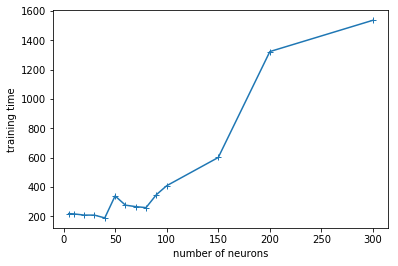

In [17]:
plt.plot([5,10,20,30,40,50,60,70,80,90,100,150,200,300],temps_neurones,'+-')
plt.ylabel('training time')
plt.xlabel('number of neurons')
plt.show()

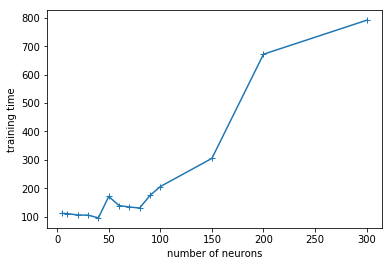

In [18]:
plt.plot([5,10,20,30,40,50,60,70,80,90,100,150,200,300],tt_neurones,'+-')
plt.ylabel('training time')
plt.xlabel('number of neurons')
plt.show()

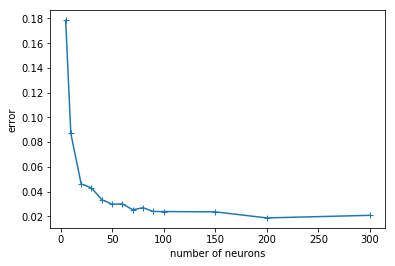

In [19]:
plt.plot([5,10,20,30,40,50,60,70,80,90,100,150,200,300],erreur_neurones,'+-')
plt.ylabel('error')
plt.xlabel('number of neurons')
plt.show()

In [20]:
tpl1 = tuple(60-i for i in range(50))
mlp = nn.MLPClassifier(hidden_layer_sizes=tpl1)
start_time = time.process_time()
mlp.fit(datatrain,targettrain)
elapsed = time.process_time() - start_time
prec = mlp.score(datatest,targettest)
print("50 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

50 couches: precision = 0.11295238095238096 temps = 176.03125
0.1123469387755102


In [21]:
pas = int(-49/20)
tpl2 = tuple(i for i in range(60,10,pas))
mlp = nn.MLPClassifier(hidden_layer_sizes=tpl2)
start_time = time.process_time()
mlp.fit(datatrain,targettrain)
elapsed = time.process_time() - start_time
prec = mlp.score(datatest,targettest)
print("20 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

20 couches: precision = 0.9683333333333334 temps = 376.921875
0.9885918367346939


In [22]:
cm = confusion_matrix(targettest,mlp.predict(datatest))
print(cm)

[[2067    0   15    4    1    3    7    0    9    3]
 [   0 2334   15    2    3    3    1    1   10    3]
 [   4    3 2020   17    2    2    3    9   14    3]
 [   0    4   13 1993    3   21    0   21   13   11]
 [   0    2    7    0 1945    1   10    3    3   15]
 [   5    3    2   20    5 1875    6    1    8   17]
 [  10    2    2    1   10   21 2015    0   10    0]
 [   3    2   22    9   21    2    0 2103    1   18]
 [   5    7   18    8   11   32    6    8 1950   20]
 [   3    2    3   12   30   10    1   18    6 2033]]


In [23]:
tpl3 = tuple(i for i in range(60,13,3))
mlp = nn.MLPClassifier(hidden_layer_sizes=tpl3)
start_time = time.process_time()
mlp.fit(datatrain,targettrain)
elapsed = time.process_time() - start_time
prec = mlp.score(datatest,targettest)
print("20 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

20 couches: precision = 0.8887619047619048 temps = 55.0
0.9121224489795918


In [24]:
tpl4 = tuple(i for i in range(10,60,5))
mlp = nn.MLPClassifier(hidden_layer_sizes=tpl4)
start_time = time.process_time()
mlp.fit(datatrain,targettrain)
elapsed = time.process_time() - start_time
prec = mlp.score(datatest,targettest)
print("10 couches: precision =",prec,"temps =",elapsed)
prec_train = mlp.score(datatrain,targettrain)
print(prec_train)

10 couches: precision = 0.9297619047619048 temps = 755.09375
0.9727346938775511


In [25]:
nb_couches = 20
archi = tuple(50 for i in range(nb_couches))

In [26]:
precisions_algos = []
rappel_algos = []
temps_algos = []
tt_algos = []
erreur_algos = []
for s in ["lbfgs","sgd","adam"]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,solver=s)
    st = time.time()
    start_time = time.process_time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_algos.append(prec)
    rappel_algos.append(rap)
    temps_algos.append(elapsed)
    tt_algos.append(duration)
    erreur_algos.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",s)

precision = 0.5638095238095238 rappel = 0.5638095238095238 erreur = 0.43619047619047624 temps = 1097.53125 pour lbfgs
precision = 0.9628571428571429 rappel = 0.9628571428571429 erreur = 0.037142857142857144 temps = 938.546875 pour sgd
precision = 0.9657142857142857 rappel = 0.9657142857142857 erreur = 0.03428571428571425 temps = 420.859375 pour adam


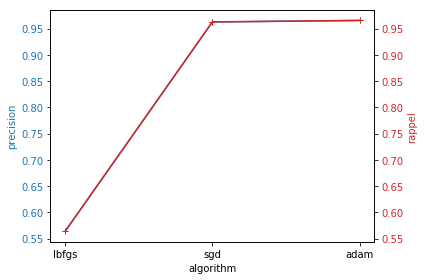

In [27]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('algorithm')
ax1.set_ylabel('precision', color=color)
ax1.plot(["lbfgs","sgd","adam"],precisions_algos,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot(["lbfgs","sgd","adam"],rappel_algos,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

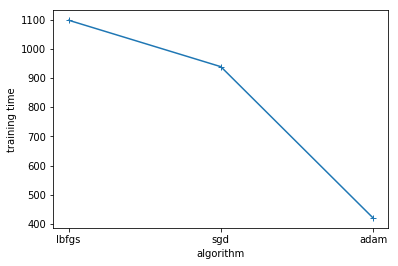

In [28]:
plt.plot(["lbfgs","sgd","adam"],temps_algos,'+-')
plt.ylabel('training time')
plt.xlabel('algorithm')
plt.show()

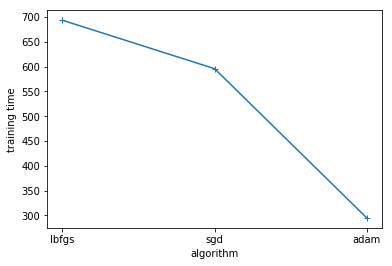

In [29]:
plt.plot(["lbfgs","sgd","adam"],tt_algos,'+-')
plt.ylabel('training time')
plt.xlabel('algorithm')
plt.show()

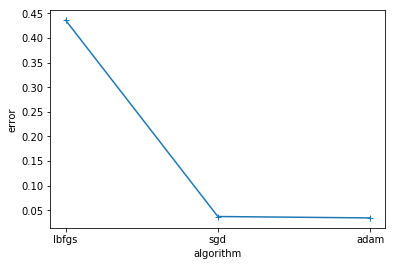

In [30]:
plt.plot(["lbfgs","sgd","adam"],erreur_algos,'+-')
plt.ylabel('error')
plt.xlabel('algorithm')
plt.show()

In [31]:
precisions_activ = []
rappel_activ = []
temps_activ = []
tt_activ = []
erreur_activ = []
for a in ["identity", "logistic", "tanh", "relu"]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,activation=a)
    st = time.time()
    start_time = time.process_time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_activ.append(prec)
    rappel_activ.append(rap)
    temps_activ.append(elapsed)
    tt_activ.append(duration)
    erreur_activ.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",a)

precision = 0.9106666666666666 rappel = 0.9106666666666666 erreur = 0.08933333333333338 temps = 184.671875 pour identity
precision = 0.11295238095238096 rappel = 0.11295238095238096 erreur = 0.8870476190476191 temps = 280.578125 pour logistic
precision = 0.9130952380952381 rappel = 0.9130952380952381 erreur = 0.08690476190476193 temps = 296.640625 pour tanh
precision = 0.9682857142857143 rappel = 0.9682857142857143 erreur = 0.031714285714285695 temps = 723.4375 pour relu


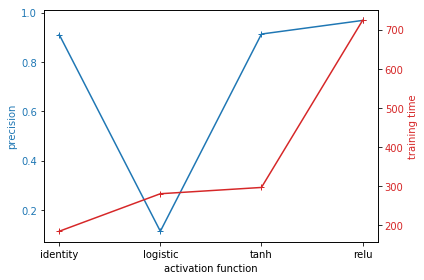

In [32]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('activation function')
ax1.set_ylabel('precision', color=color)
ax1.plot(["identity", "logistic", "tanh", "relu"],precisions_activ,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('training time', color=color)
ax2.plot(["identity", "logistic", "tanh", "relu"],temps_activ,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

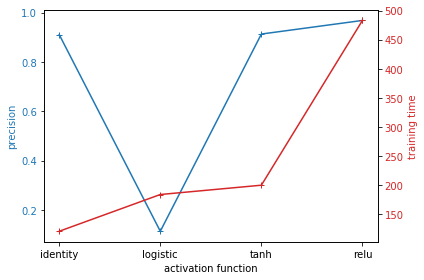

In [33]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('activation function')
ax1.set_ylabel('precision', color=color)
ax1.plot(["identity", "logistic", "tanh", "relu"],precisions_activ,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('training time', color=color)
ax2.plot(["identity", "logistic", "tanh", "relu"],tt_activ,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

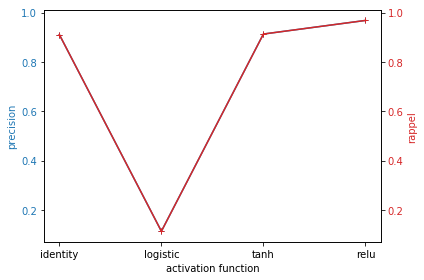

In [34]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('activation function')
ax1.set_ylabel('precision', color=color)
ax1.plot(["identity", "logistic", "tanh", "relu"],precisions_activ,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot(["identity", "logistic", "tanh", "relu"],rappel_activ,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

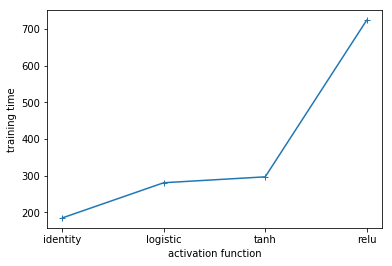

In [35]:
plt.plot(["identity", "logistic", "tanh", "relu"],temps_activ,'+-')
plt.ylabel('training time')
plt.xlabel('activation function')
plt.show()

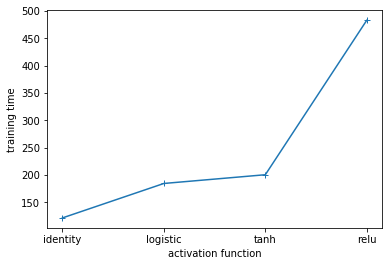

In [36]:
plt.plot(["identity", "logistic", "tanh", "relu"],tt_activ,'+-')
plt.ylabel('training time')
plt.xlabel('activation function')
plt.show()

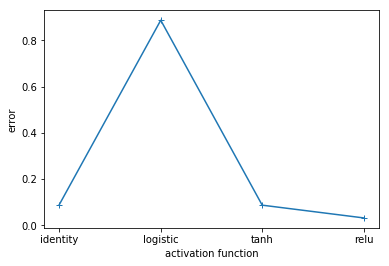

In [37]:
plt.plot(["identity", "logistic", "tanh", "relu"],erreur_activ,'+-')
plt.ylabel('error')
plt.xlabel('activation function')
plt.show()

In [ ]:
precisions_regul = []
rappel_regul = []
temps_regul = []
tt_regul = []
erreur_regul = []
for a in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,alpha=a)
    st = time.time()
    start_time = time.process_time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.process_time()-start_time
    duration = time.time()-st
    testpred = mlp.predict(datatest)
    prec = mlp.score(datatest,targettest)
    rap = recall_score(targettest,testpred,average='micro')
    err = zero_one_loss(targettest,testpred)
    precisions_regul.append(prec)
    rappel_regul.append(rap)
    temps_regul.append(elapsed)
    tt_regul.append(duration)
    erreur_regul.append(err)
    print("precision =", prec,"rappel =",rap,"erreur =",err,"temps =",elapsed,"pour",a)

precision = 0.9707142857142858 rappel = 0.9707142857142858 erreur = 0.02928571428571425 temps = 544.28125 pour 0.1


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


precision = 0.9724285714285714 rappel = 0.9724285714285714 erreur = 0.02757142857142858 temps = 524.5 pour 0.01


In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('regularization')
ax1.set_xscale("log")
ax1.set_ylabel('precision', color=color)
ax1.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],precisions_regul,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],temps_regul,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('regularization')
ax1.set_xscale("log")
ax1.set_ylabel('precision', color=color)
ax1.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],precisions_regul,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('execution time', color=color)
ax2.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],tt_regul,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('regularization')
ax1.set_xscale("log")
ax1.set_ylabel('precision', color=color)
ax1.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],precisions_regul,'+-',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('rappel', color=color)
ax2.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],rappel_regul,'r+-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
plt.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],temps_regul,'+-')
plt.ylabel('training time')
plt.xlabel('regularization')
plt.xscale('log')
plt.show()

In [ ]:
plt.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],tt_regul,'+-')
plt.ylabel('training time')
plt.xlabel('regularization')
plt.xscale('log')
plt.show()

In [ ]:
plt.plot([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],erreur_regul,'+-')
plt.ylabel('error')
plt.xlabel('regularization')
plt.xscale('log')
plt.show()